In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = np.loadtxt('data/data.txt', dtype=int)

In [24]:
movies=pd.read_csv('data/movies.csv', sep=',', encoding='latin1')


In [27]:
def get_movie_from_id(movies, movie_id):
    return movies.iloc[movie_id-1]['Movie Title']

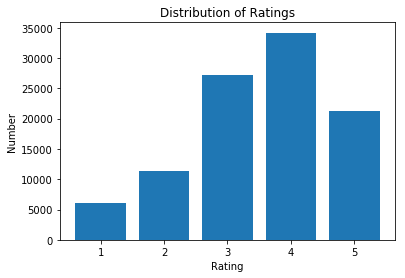

In [38]:
# Plot the distribution of all ratings
freq, labels = np.histogram(data[:,2], bins = 5)

plt.figure()
plt.title('Distribution of Ratings')
plt.bar(np.arange(1, 6), freq)
plt.xlabel('Rating')
plt.ylabel('Number')
plt.show()

[168  79  22 107  49 108  40 142  39 174]


[168  79  22 107  49 108  40 142  39 174]


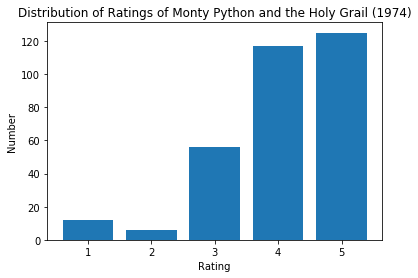

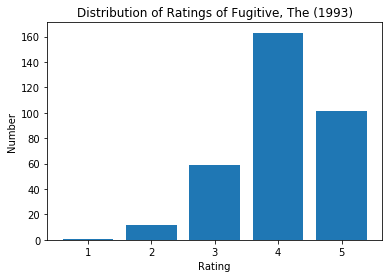

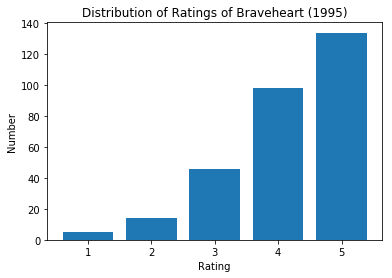

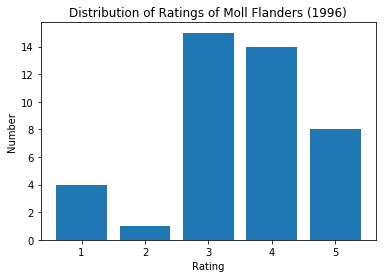

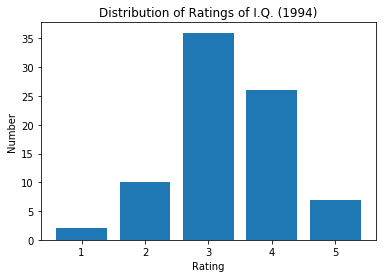

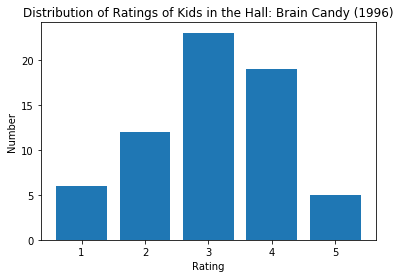

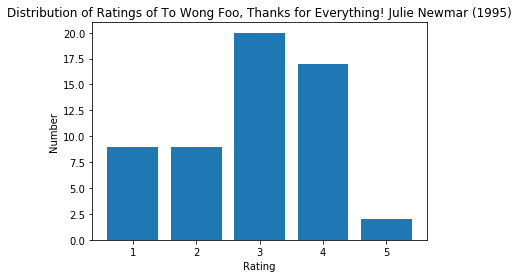

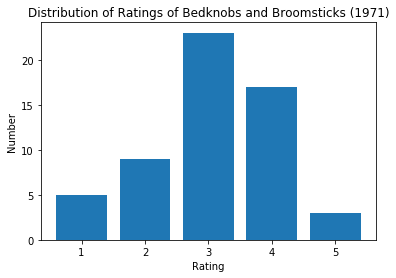

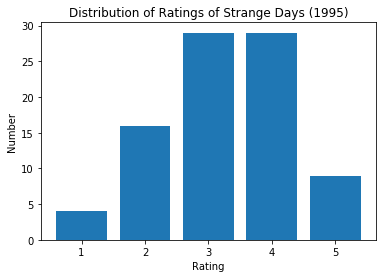

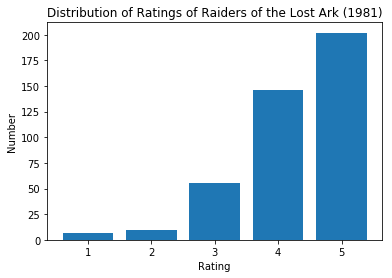

In [84]:
movie_id_sorted = np.bincount(data[:,0])[::-1]
print(test[:10])

import pdb
for movie_id in (movie_id_sorted[:10]):
    inds = (data[:,1] == movie_id)                              
    freq, labels = np.histogram(data[:,2][inds], bins = 5)
    plt.figure()
    plt.title('Distribution of Ratings of {}'.format(get_movie_from_id(movies, movie_id)))
    plt.bar(np.arange(1, 6), freq)
    plt.xlabel('Rating')
    plt.ylabel('Number')
    plt.show()

In [87]:
avg = np.zeros(len(movies))
for movie_id in movies['Movie Id']:
    inds = (data[:,1] == movie_id)
    avg[movie_id-1] = (np.mean(data[:,2][inds]))

movies['Avg'] = avg

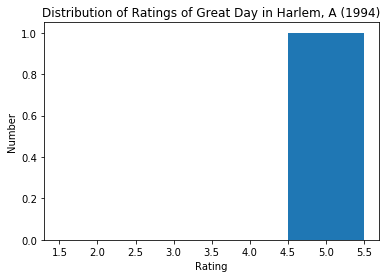

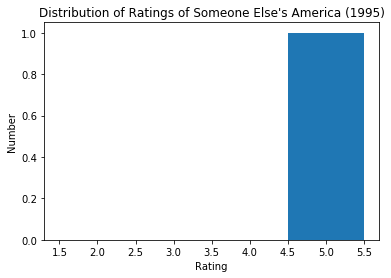

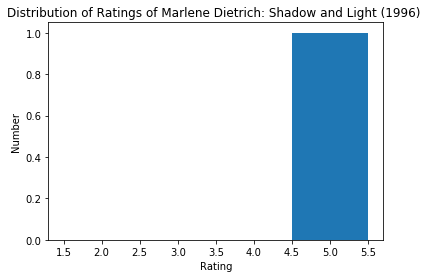

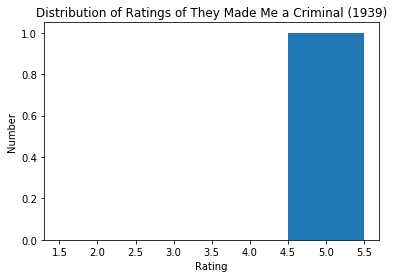

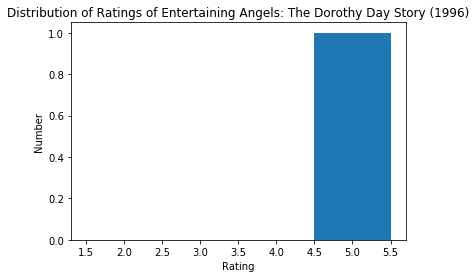

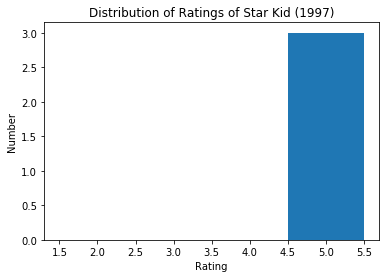

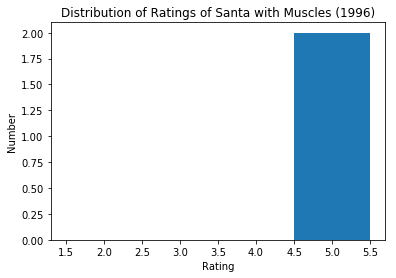

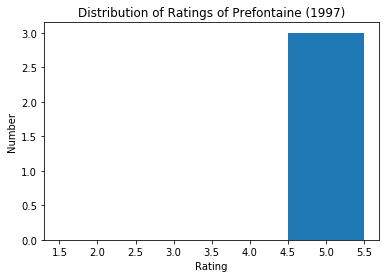

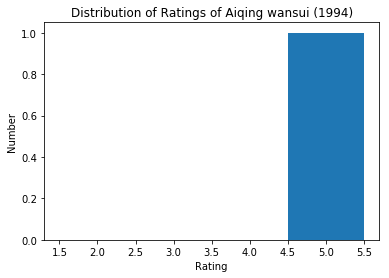

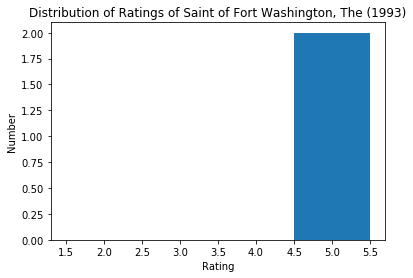

In [95]:
for movie_id in (movies.sort_values('Avg', ascending=False)[:10]['Movie Id']):
    inds = (data[:,1] == movie_id)                              
    freq, labels = np.histogram(data[:,2][inds], bins = 5)
    plt.figure()
    plt.title('Distribution of Ratings of {}'.format(get_movie_from_id(movies, movie_id)))
    plt.hist(data[:,2][inds], bins=np.arange(1,6)+.5)
    plt.xlabel('Rating')
    plt.ylabel('Number')
    plt.show()

In [100]:
movies.columns

Index(['Movie Id', 'Movie Title', 'Unknown', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'Avg'],
      dtype='object')

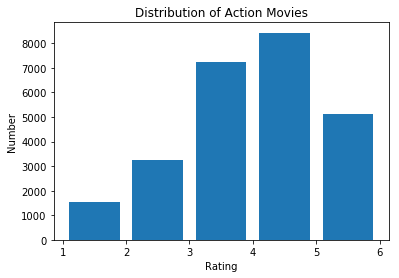

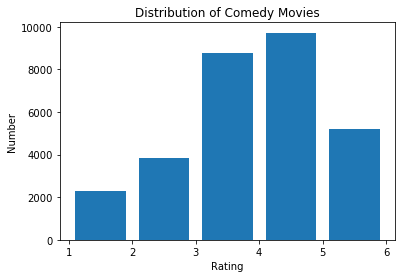

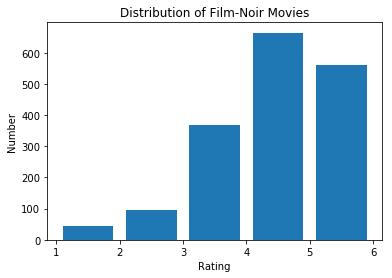

In [111]:
genres = ['Action', 'Comedy', 'Film-Noir']

for genre in genres:
    ids = movies[movies[genre]==1]['Movie Id']
    freqs = np.zeros(5)
    for movie_id in ids:
        inds = (data[:,1] == movie_id)                              
        freq, labels = np.histogram(data[:,2][inds], bins = np.arange(6)+.5)
        freqs += freq
    plt.figure()
    plt.title('Distribution of {} Movies'.format(genre))
    plt.xlabel('Rating')
    plt.ylabel('Number')
    plt.bar(np.arange(1,6)+.5, freqs)
    plt.show()